# MSD for Cl vacancy compensated

In [19]:
import numpy as np
from ovito.io import *
from ovito.modifiers import *
from ovito.pipeline import *

step_count = []
na = []

with open('outputs/na_traj_schottky.txt') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('outputs/na_traj_schottky.txt') as file:
    content = file.readlines()
for line in content:
    if '1 1.0' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

# Load input data and create a data pipeline:
pipeline = import_file("./outputs/na_traj_schottky.txt")

# Define reference frame
mod = CalculateDisplacementsModifier(minimum_image_convention = False)

# Calculate per-particle displacements with respect to initial simulation frame:
pipeline.modifiers.append(mod)

# Define the custom modifier function:
def calculate_msd(frame, data):

    # Access the per-particle displacement magnitudes computed by the 
    # CalculateDisplacementsModifier that precedes this user-defined modifier in the 
    # data pipeline:
    displacement_magnitudes = data.particles['Displacement Magnitude']
    particle_types = data.particles['Particle Type']

    # Output MSD value as a global attribute:
    data.attributes["MSD Type 1"] = np.sum(displacement_magnitudes[particle_types == 2]**2) / na_atoms


# Insert user-defined modifier function into the data pipeline:
pipeline.modifiers.append(calculate_msd)

# Export calculated MSD value to a text file and let OVITO's data pipeline do the rest:
export_file(pipeline, "./outputs/na_msd_schottky.txt", 
    format = "txt/attr",
    multiple_frames = True, start_frame = 1,
    columns = ["Timestep", "MSD Type 1"])

# MSD for Mg dopant compensated

In [12]:
import numpy as np
from ovito.io import *
from ovito.modifiers import *
from ovito.pipeline import *

step_count = []
na = []

with open('outputs/mg.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('outputs/mg.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if '2 1.0' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

# Load input data and create a data pipeline:
pipeline = import_file("./outputs/schottky.lammpstrj")

# Define reference frame
mod = CalculateDisplacementsModifier(reference_frame = 0)

# Calculate per-particle displacements with respect to initial simulation frame:
pipeline.modifiers.append(mod)

# Define the custom modifier function:
def calculate_msd(frame, data):

    # Access the per-particle displacement magnitudes computed by the 
    # CalculateDisplacementsModifier that precedes this user-defined modifier in the 
    # data pipeline:
    displacement_magnitudes = data.particles['Displacement Magnitude']
    particle_types = data.particles['Particle Type']

    # Output MSD value as a global attribute:
    data.attributes["MSD Type 1"] = np.sum(displacement_magnitudes[particle_types == 2]**2) / na_atoms


# Insert user-defined modifier function into the data pipeline:
pipeline.modifiers.append(calculate_msd)

# Export calculated MSD value to a text file and let OVITO's data pipeline do the rest:
export_file(pipeline, "./outputs/na_msd_mg.txt", 
    format = "txt/attr",
    multiple_frames = True, start_frame = 1,
    columns = ["Timestep", "MSD Type 1"])

# MSD for Ca dopant compensated

In [13]:
import numpy as np
from ovito.io import *
from ovito.modifiers import *
from ovito.pipeline import *

step_count = []
na = []

with open('outputs/ca.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('outputs/ca.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if '1 1.0' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

# Load input data and create a data pipeline:
pipeline = import_file("./outputs/schottky.lammpstrj")

# Define reference frame
mod = CalculateDisplacementsModifier(reference_frame = 0)

# Calculate per-particle displacements with respect to initial simulation frame:
pipeline.modifiers.append(mod)

# Define the custom modifier function:
def calculate_msd(frame, data):

    # Access the per-particle displacement magnitudes computed by the 
    # CalculateDisplacementsModifier that precedes this user-defined modifier in the 
    # data pipeline:
    displacement_magnitudes = data.particles['Displacement Magnitude']
    particle_types = data.particles['Particle Type']

    # Output MSD value as a global attribute:
    data.attributes["MSD Type 1"] = np.sum(displacement_magnitudes[particle_types == 2]**2) / na_atoms


# Insert user-defined modifier function into the data pipeline:
pipeline.modifiers.append(calculate_msd)

# Export calculated MSD value to a text file and let OVITO's data pipeline do the rest:
export_file(pipeline, "./outputs/na_msd_ca.txt", 
    format = "txt/attr",
    multiple_frames = True, start_frame = 1,
    columns = ["Timestep", "MSD Type 1"])

# MSD plot

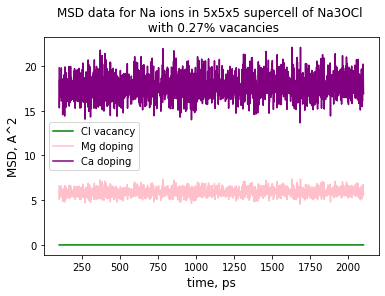

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Import MSD files as lists:
na_step, na_msd = np.loadtxt('./outputs/na_msd_schottky.txt', skiprows=1, unpack=True)
mg_step, mg_msd = np.loadtxt('./outputs/na_msd_mg.txt', skiprows=1, unpack=True)
ca_step, ca_msd = np.loadtxt('./outputs/na_msd_ca.txt', skiprows=1, unpack=True)
steps = na_step / 1000

# Plot cumulative MSD:        
plt.plot(steps, na_msd, color='green')
plt.plot(steps, mg_msd, color='pink')
plt.plot(steps, ca_msd, color='purple')
plt.legend(labels = ['Cl vacancy', 'Mg doping', 'Ca doping'])
plt.xlabel('time, ps', size = 12)
plt.ylabel('MSD, A^2', size = 12)
plt.title('MSD data for Na ions in 5x5x5 supercell of Na3OCl \n with 0.27% vacancies')
plt.savefig('/home/ben/Documents/lammps_calcs/5x5x5/graphs/msd.jpg', bbox_inches='tight', dpi=500)

# MSD log plot

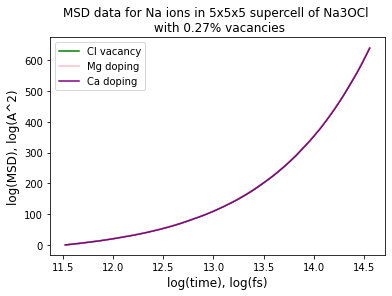

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create log MSD lists:
log_step = np.log(na_step)

# Plot log MSD:
plt.plot(log_step, na, color='green')
plt.plot(log_step, mg, color='pink')
plt.plot(log_step, ca, color='purple')
plt.legend(labels = ['Cl vacancy', 'Mg doping', 'Ca doping'])
plt.xlabel('log(time), log(fs)', size = 12)
plt.ylabel('log(MSD), log(A^2)', size = 12)
plt.title('MSD data for Na ions in 5x5x5 supercell of Na3OCl \n with 0.27% vacancies')
plt.savefig('/home/ben/Documents/lammps_calcs/5x5x5/graphs/logmsd.jpg', bbox_inches='tight', dpi=500)

# MSD log-log plot

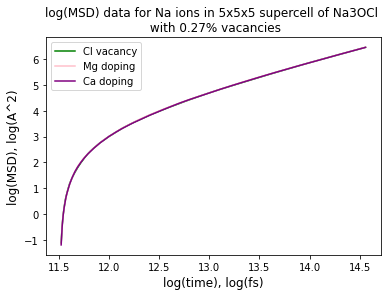

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create log MSD lists:
log_step = np.log(na_step)
logna = np.log(na)
logmg = np.log(mg)
logca = np.log(ca)

# Plot log MSD:
plt.plot(log_step, logna, color='green')
plt.plot(log_step, logmg, color='pink')
plt.plot(log_step, logca, color='purple')
plt.legend(labels = ['Cl vacancy', 'Mg doping', 'Ca doping'])
plt.xlabel('log(time), log(fs)', size = 12)
plt.ylabel('log(MSD), log(A^2)', size = 12)
plt.title('log(MSD) data for Na ions in 5x5x5 supercell of Na3OCl \n with 0.27% vacancies')
plt.savefig('/home/ben/Documents/lammps_calcs/5x5x5/graphs/loglogmsd.jpg', bbox_inches='tight', dpi=500)

In [ ]:
# Find diffusion coefficient:
na_slope, intercept = np.polyfit(steps, na, 1)
na_slope_standard = na_slope * (10 ** (-11))
mg_slope, intercept = np.polyfit(steps, mg, 1)
mg_slope_standard = mg_slope * (10 ** (-11))
ca_slope, intercept = np.polyfit(steps, ca, 1)
ca_slope_standard = ca_slope * (10 ** (-11))
print(f'The diffusion coefficient for the Cl vacancy compensated structure is {na_slope_standard} m^2/s')
print(f'The diffusion coefficient for the Mg dopant compensated structure is {mg_slope_standard} m^2/s')
print(f'The diffusion coefficient for the Ca dopant compensated structure is {ca_slope_standard} m^2/s')